In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

In [ ]:
nalco = yf.Ticker("NATIONALUM.NS")
df = nalco.history(period="1y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-10 00:00:00+05:30,204.895270,209.589207,201.372445,202.534027,11583219,0.0,0.0
2024-10-11 00:00:00+05:30,205.276112,213.169143,204.942866,212.245590,30278995,0.0,0.0
2024-10-14 00:00:00+05:30,214.226006,221.319264,213.759464,215.711304,33271618,0.0,0.0
2024-10-15 00:00:00+05:30,216.130242,216.511083,205.999733,208.532364,13483112,0.0,0.0
2024-10-16 00:00:00+05:30,207.561183,210.646042,205.466531,206.904221,15501988,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-06 00:00:00+05:30,222.050003,223.500000,216.740005,217.149994,7789646,0.0,0.0
2025-10-07 00:00:00+05:30,217.899994,220.000000,216.000000,217.070007,6033212,0.0,0.0
2025-10-08 00:00:00+05:30,218.149994,226.250000,218.050003,223.619995,32888505,0.0,0.0


In [ ]:
df.reset_index(inplace=True)
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-10-10 00:00:00+05:30,204.895270,209.589207,201.372445,202.534027,11583219,0.0,0.0
1,2024-10-11 00:00:00+05:30,205.276112,213.169143,204.942866,212.245590,30278995,0.0,0.0
2,2024-10-14 00:00:00+05:30,214.226006,221.319264,213.759464,215.711304,33271618,0.0,0.0
3,2024-10-15 00:00:00+05:30,216.130242,216.511083,205.999733,208.532364,13483112,0.0,0.0
4,2024-10-16 00:00:00+05:30,207.561183,210.646042,205.466531,206.904221,15501988,0.0,0.0


In [ ]:
df = df.sort_values('Date')
df['MA5'] = df['Close'].rolling(window=5).mean()     # ma = moving average
df['MA10'] = df['Close'].rolling(window=10).mean()
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA5,MA10
0,2024-10-10 00:00:00+05:30,204.895270,209.589207,201.372445,202.534027,11583219,0.0,0.0,NaN,NaN
1,2024-10-11 00:00:00+05:30,205.276112,213.169143,204.942866,212.245590,30278995,0.0,0.0,NaN,NaN
2,2024-10-14 00:00:00+05:30,214.226006,221.319264,213.759464,215.711304,33271618,0.0,0.0,NaN,NaN
3,2024-10-15 00:00:00+05:30,216.130242,216.511083,205.999733,208.532364,13483112,0.0,0.0,NaN,NaN
4,2024-10-16 00:00:00+05:30,207.561183,210.646042,205.466531,206.904221,15501988,0.0,0.0,209.185501,NaN
5,2024-10-17 00:00:00+05:30,212.331290,218.691430,212.331290,214.387863,49129394,0.0,0.0,211.556268,NaN
6,2024-10-18 00:00:00+05:30,213.273892,221.652512,208.227676,221.005066,29937444,0.0,0.0,213.308163,NaN
7,2024-10-21 00:00:00+05:30,223.509105,224.099412,216.844297,218.986557,23460136,0.0,0.0,213.963214,NaN
8,2024-10-22 00:00:00+05:30,219.938678,219.938678,209.113129,209.912903,23708999,0.0,0.0,214.239322,NaN
9,2024-10-23 00:00:00+05:30,209.465423,218.177275,209.075052,213.283401,13793244,0.0,0.0,215.515158,212.35033


In [ ]:

df['Return'] = df['Close'].pct_change()

df['High_Low_Range'] = df['High'] - df['Low']
df['Momentum'] = df['Close'] - df['Close'].shift(1)
df['Volume_Change'] = df['Volume'].pct_change()

# RSI
window_length = 14
delta = df['Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window_length, min_periods=1).mean()
avg_loss = pd.Series(loss).rolling(window=window_length, min_periods=1).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Exponential Moving Averages
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

#MACD (Moving Average Convergence Divergence)
df['MACD'] = df['EMA12'] - df['EMA26']

df = df.dropna().reset_index(drop=True)
print(df.head(10))


                       Date        Open        High         Low       Close  \
0 2024-10-23 00:00:00+05:30  209.465423  218.177275  209.075052  213.283401   
1 2024-10-24 00:00:00+05:30  215.082904  216.796715  210.350889  215.511368   
2 2024-10-25 00:00:00+05:30  214.130782  214.273608  198.658904  208.389526   
3 2024-10-28 00:00:00+05:30  208.465693  216.463472  207.761137  213.073929   
4 2024-10-29 00:00:00+05:30  213.083447  218.253427  209.351156  217.320358   
5 2024-10-30 00:00:00+05:30  216.987125  219.938689  215.025770  216.244476   
6 2024-10-31 00:00:00+05:30  215.273339  217.463193  210.788868  216.434921   
7 2024-11-01 00:00:00+05:30  218.796160  219.967259  217.558407  218.177277   
8 2024-11-04 00:00:00+05:30  217.948775  220.500437  212.369377  219.767319   
9 2024-11-05 00:00:00+05:30  219.748266  225.556162  217.824989  223.775711   

     Volume  Dividends  Stock Splits         MA5        MA10    Return  \
0  13793244        0.0           0.0  215.515158  212.35

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

features_to_check = ['Close', 'MA5', 'MA10', 'Return', 'Volume_Change']

# Replace positive/negative infinity with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=features_to_check).reset_index(drop=True)


features = ['Close', 'MA5', 'MA10', 'Return', 'Volume_Change']
data = df[features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
time_step = 10
X, y = [], []

for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), :])   # previous 10 days
    y.append(scaled_data[i + time_step, 0])       # next day's Close

X = np.array(X)
y = np.array(y)

# Split into train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (183, 10, 5), Test shape: (46, 10, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
ann_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1]*X_train.shape[2],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
ann_model.summary()

# Flatten input for ANN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

history_ann = ann_model.fit(
    X_train_flat, y_train,
    validation_data=(X_test_flat, y_test),
    epochs=50, batch_size=16, verbose=1
)
ann_pred = ann_model.predict(X_test_flat)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.5528 - val_loss: 0.0205
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0536 - val_loss: 0.0045
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0251
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0057
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - val_loss: 0.0058
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0087
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val

In [ ]:
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_pred))
ann_r2 = r2_score(y_test, ann_pred)
print(f"ANN RMSE:  {ann_rmse:.4f}, R²: {ann_r2:.4f}")

ANN RMSE:  0.0587, R²: 0.7871


In [ ]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=16, verbose=1
)

# LSTM predictions
lstm_pred = lstm_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2734 - val_loss: 0.0204
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0233 - val_loss: 0.0069
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - val_loss: 0.0197
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - val_loss: 0.0064
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0114 - val_loss: 0.0085
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104 - val_loss: 0.0103
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

In [ ]:
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
lstm_r2 = r2_score(y_test, lstm_pred)
print(f"LSTM RMSE: {lstm_rmse:.4f}, R²: {lstm_r2:.4f}")

LSTM RMSE: 0.0508, R²: 0.8406


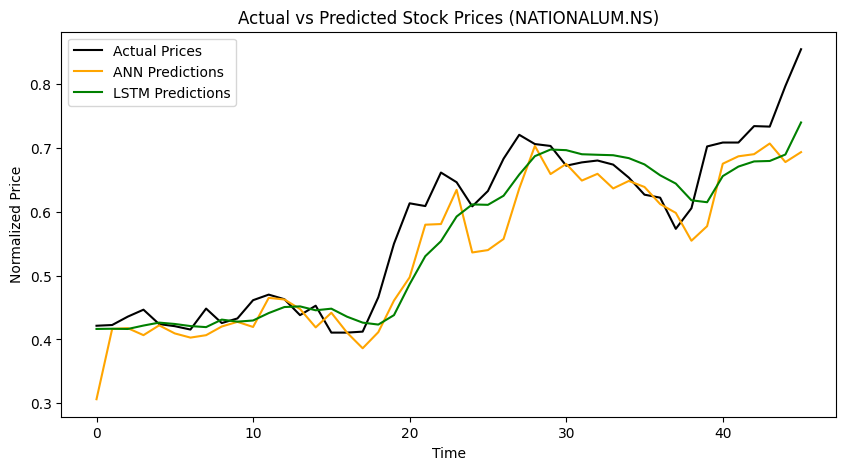

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Prices', color='black')
plt.plot(ann_pred, label='ANN Predictions', color='orange')
plt.plot(lstm_pred, label='LSTM Predictions', color='green')
plt.title("Actual vs Predicted Stock Prices (NATIONALUM.NS)")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

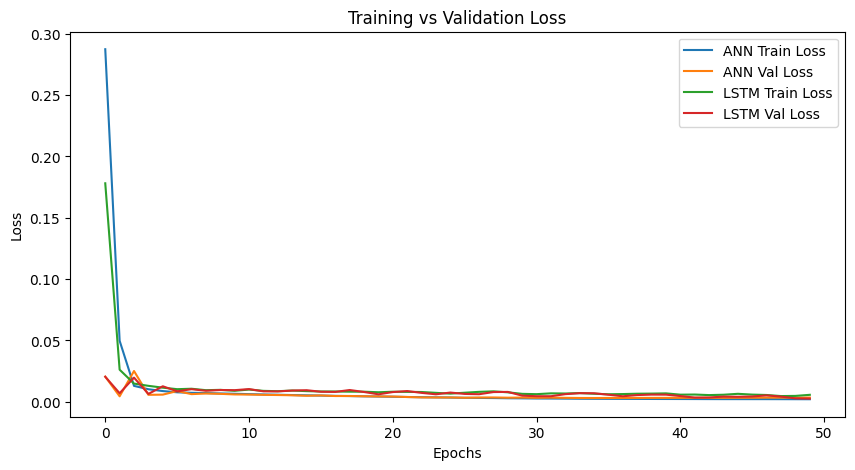

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history_ann.history['loss'], label='ANN Train Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()